In [60]:
from simcon import *

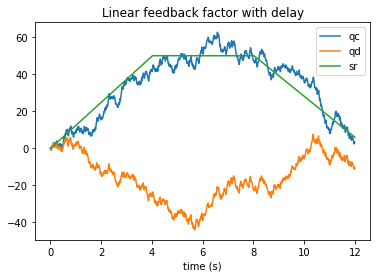

In [3]:
program = """title Linear feedback factor with delay
time 12.0 0.01
temp0 generator random 0.3 0.3 0.3
qd summator temp0 40.0
#qd generator puls 2.0 6.0 40.0
sr func 0.0 0.0 4.0 50.0 8.0 50.0 12.5 0.0
se comparator sr sp
qo amplifier 0.0 se 1000.0 400.0
qc summator qo 1.0 qd 1.0
temp1 summator qc 1.0
sp delay temp1 0.2
group se qo qc
plot t qc qd sr
"""
a = AnalogComputer(program).run().plot()

In [49]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

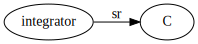

In [55]:
gv("I [label=integrator]; I->C [label=sr]")

In [51]:
def graph(a):
    g = 'ratio="compress"\n size=5\n'
    signals = list(a.program["blocks"].keys())

    for s in signals:
        t = type(a.blocks[s]).__name__
        shape = ""
        if t == "Summator": 
            t = '"+"'
            shape = " shape = circle "
        elif t == "Comparator":
            t = "comp"
            shape = " shape = diamond "
        ins = [I.output_label for I in a.blocks[s].ins]
        #print(s, t, ins)
        g += s + " [label=" + t + shape + "]\n"
        for i in ins:
            g+= i+ "->" + s + "[label=" + i + "]\n";

    g = g[:-1]
    print(g)
    return gv(g)

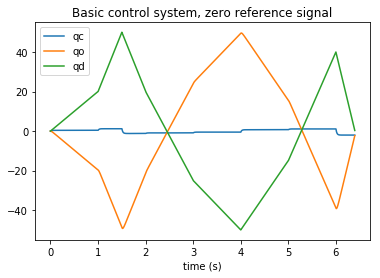

ratio="compress"
 size=5
sr [label=Const]
qd [label=Func]
se [label=comp shape = diamond ]
sr->se[label=sr]
sp->se[label=sp]
qo [label=Integrator]
se->qo[label=se]
qc [label="+" shape = circle ]
qo->qc[label=qo]
qd->qc[label=qd]
sp [label="+" shape = circle ]
qc->sp[label=qc]


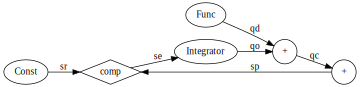

In [63]:
program = """
title Basic control system, zero reference signal
time 6.4 0.001
sr const 0
qd func 0.0 0.0 1.0 20.0 1.5 50.0 2.0 20.0 3.0 -25.0 4.0 -50.0 5.0 -15.0 6.0 40.0
se comparator sr sp
qo integrator 0.0 se 50.0
qc summator qo 1.0 qd 1.0
sp summator qc 1.0
group qc sp se qo
plot t qc qo qd
"""
a = AnalogComputer(program).run().plot()
graph(a)

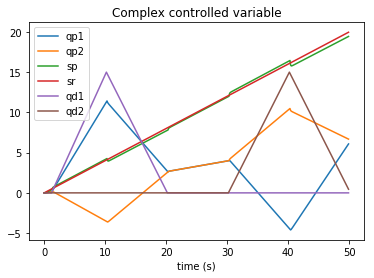

ratio="compress"
 size=5
qd1 [label=Func]
qd2 [label=Func]
qp1 [label="+" shape = circle ]
qd1->qp1[label=qd1]
qo->qp1[label=qo]
qp2 [label="+" shape = circle ]
qd2->qp2[label=qd2]
qo->qp2[label=qo]
sp [label="+" shape = circle ]
qp1->sp[label=qp1]
qp2->sp[label=qp2]
sr [label=Generator]
se [label=comp shape = diamond ]
sr->se[label=sr]
sp->se[label=sp]
qo [label=Amplifier]
se->qo[label=se]


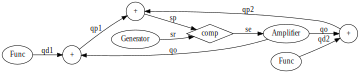

In [64]:
program = """title Complex controlled variable
time 50 0.1
qd1 func 1 0 10 15 20 0
qd2 func 30 0 40 15 50 0
qp1 summator qd1 1 qo 1
qp2 summator qd2 1 qo 1
sp summator qp1 1 qp2 2
sr generator ramp 0 50 20
se comparator sr sp
qo amplifier 0 se 200 80.0
group qp1 qp2 sp se qo
plot t qp1 qp2 sp sr qd1 qd2
"""

a = AnalogComputer(program).run().plot()
graph(a)

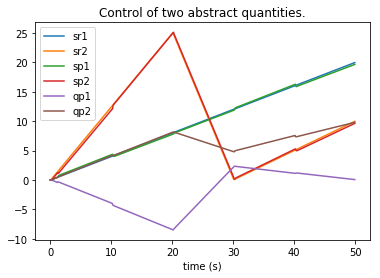

In [312]:
program = """title Control of two abstract quantities.
time 50 0.05
qd1 func 1 0 10 15 20 0
qd2 func 30 0 40 15 50 0
sr1 generator ramp 0 50 20
sr2 func 20 25 30 0.0 50 10
sp1 summator qp1 1 qp2 2
sp2 summator qp1 -2 qp2 1
se1 comparator sr1 sp1
se2 comparator sr2 sp2
qo1 amplifier 0 se1 100 30.0
qo2 amplifier 0 se2 100 30.0
qp1 summator qd1 1 qo1 1 qo2 -1
qp2 summator qd2 1 qo1 1 qo2  1
group sp1 se1 qo1 
group sp2 se2 qo2
plot t sr1 sr2 sp1 sp2 qp1 qp2"""

a = AnalogComputer(program).run().plot()


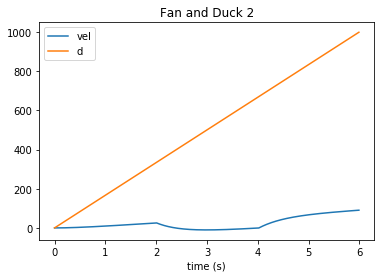

In [57]:
fan_and_duck= """
title Fan and Duck 2
time 6.0 0.01
d generator ramp 0.0 6.0 1000.0
o generator puls 2.0 4.0 -120.0
sr const 50.0
effect summator d 0.1 o 0.5  
vel amplifier 0.0 effect 1.0 0.5
sp summator vel 1.0
se comparator sr sp
plot t vel d
"""

a= AnalogComputer(fan_and_duck).run().plot()


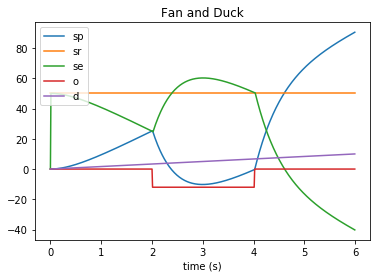

In [167]:
program = """title Fan and Duck
time 6.0 0.01
d generator ramp 0.0 6.0 1000.0
o generator puls 2.0 4.0 -120.0
sr const 50.0
effect summator d 0.1 o 0.5  
vel amplifier 0.0 effect 1.0 0.5
sp summator vel 1.0
se comparator sr sp
plot t sp sr se o d
scale 1 1 1 1 0.1 0.01
"""
a= AnalogComputer(program).run().plot()

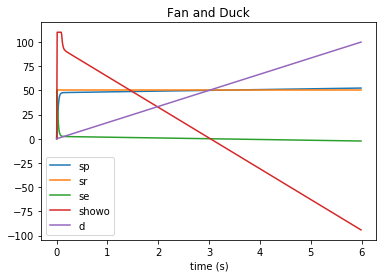

In [168]:
program = """
title Fan and Duck
time 6.0 0.01
d generator ramp 0.0 6.0 1000.0
sr const 50.0
effect summator d 0.1 o 0.5  
vel amplifier 0 effect 1.0 0.5
sp summator vel 1.0
se comparator sr sp
o summator se 40.0
showo limit o -110 110
group vel sp se o
plot t sp sr se showo d
scale 1 1.0 1.0 1.0 1.0 0.1
"""
a = AnalogComputer(program).run().plot()

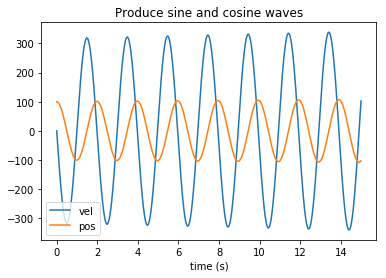

In [169]:
program1 = """
# mass on a spring
title Produce sine and cosine waves
time 15.0 0.001
group force vel pos
plot t vel pos
scale 1.0 1.0 1.0
vel integrator 0.0 force 2.0
pos integrator 100.0 vel 1.0
force summator pos -5.0
"""
a = AnalogComputer(program1).run().plot()


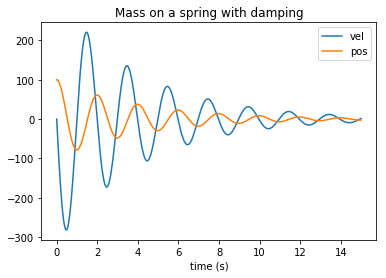

In [171]:
program2 = """
title Mass on a spring with damping
time 15.0 0.001
group force vel pos
plot t vel pos
scale 1.0 1.0 1.0
begin
vel integrator 0.0 force 2.0 vel -0.5
pos integrator 100.0 vel 1.0
force summator pos -5.0
end
"""

a = AnalogComputer(program2).run().plot()

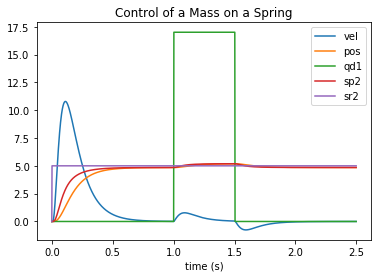

In [313]:
program = """title Control of a Mass on a Spring
time 2.5 0.002
#
# ENVIRONMENT: mass on spring with viscous damping and disturbance
#
#sum of disturbance force, friction force, spring force & output force
qd1 generator puls 1.0 1.5 17.0   #force disturbance acting on mass 
vel integrator 0.0 acc 1.0        # integrate forces to get velocity
pos integrator 0.0 vel 2.0        # integrate velocity to get position  
acc summator qd1 1.0 vel -0.3 pos -1.5 qo1 1.0
#
# FIRST LEVEL OF CONTROL -- VELOCITY CONTROL
se1 comparator so2 vel            # first-level loop: velocity feedback
qo1 amplifier 0.0 se1 12.0 0.01   # first-level output function
#
# SECOND LEVEL OF CONTROL -- POSITION CONTROL
sr2 generator puls 0.0 2.5 5.0    #reference signal, position control
sp2 summator pos 10.0 fb2 -1.0    # second-level input function with
fb2 amplifier 0 sp2 9.0 0.08    # integral neg fb (phase lead)
se2 comparator sr2 sp2            # second-level comparator
so2 amplifier 0 se2 4.0 0.01    # second level output function
# 
# PROGRAM DIRECTIVES
group qd1 vel pos acc             # minimize environmental delays
group sp2 fb2                     # fast feedback
plot acc vel pos qd1 sp2 sr2
scale  0.1 1.0 1.0 1.0 1.0 1.0
"""
a = AnalogComputer(program).run().plot()

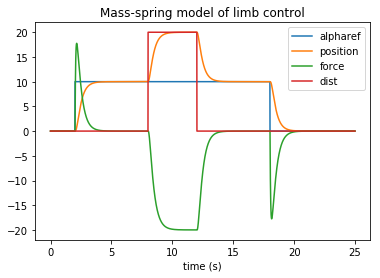

In [326]:
program = """title Mass-spring model of limb control
time 25.0 0.01

alpharef generator puls 2 18 1
dist generator puls 8 12 20  # 20 nm

contraction amplifier 0 alpharef 1.0 0.05             # 1 radian/nsu
length      summator contraction 1 position -1       # c - x radians
force       summator  length 20                      # 20 nm/radian

vel         integrator 0.0 force 1.0 vel -10 dist 1  # J= 1 n-m^2
position    integrator 0.0 vel   1.0                 # radians

group contraction length force 
group vel position

plot t alpharef position  force  dist 
scale 1   10.0    10.0     1.0   1.0
"""
a = AnalogComputer(program).run().plot()

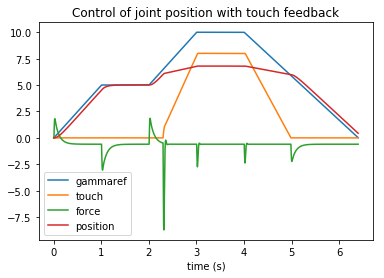

In [322]:
program = """title Control of joint position with touch feedback
time 6.4 0.001

# reference signals

gammaref func 0 0 1 5 2 5 3 10 4 10 6.4 0 
alpharef const 0.0

distance const 6.0

# inner control loop

se1         summator  force -1 se2 500.0 alpharef 1.0 touch -200
contraction amplifier 0 se1 1 0.07                                   # 1 radian/nsu
stretch     summator  position -1.0 contraction 1
force       summator  stretch 40 velocity -5.5                       # newtons/radian
temp        summator  position 1 distance -1
temp1       limit     temp 0 50000
touch       summator  temp1 10.0


# movement of mass

velocity integrator 0.0 force 1.0 distance 1.0  
position integrator 0.0 velocity 1.0

# second level control loop

sp2 summator position 30 xp -29
xp  amplifier 0 sp2 1.0 0.1
se2 comparator gammaref sp2

group se1 contraction stretch force temp temp1 touch velocity
group position velocity sp2 xp se2

plot t gammaref touch force position
scale 1  1.0      1.0   0.1    1.0   
"""
a = AnalogComputer(program).run().plot()



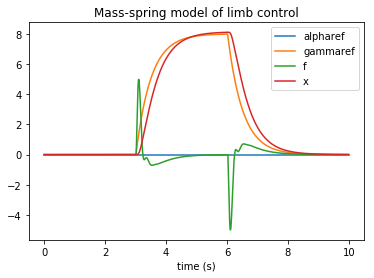

In [325]:
program = """title Mass-spring model of limb control
time 10.0 0.01

alph generator puls 1 8 10
alpharef amplifier 0 alph 0.0 1.0
gam generator puls 3 6 8
gammaref amplifier 0 gam 1.0 0.5

se1       summator alpharef 1.0 f -1.0 se2 60
c         amplifier 0 se1 1.0 0.25            # length contractile element
l         summator  x 1 c 1                   # spring length = x + c
f         summator  l 20.0                    # force = length * ks

vel       integrator 0.0 f 1.6                # J = 1 n-m^2
x         integrator 0.0 vel 1.0              # radians

sp2       summator x 10.0 temp -9.0
temp      amplifier 0 sp2 1.0 0.23
se2       comparator gammaref sp2

group  se1 c l
group  vel x sp2 temp gammaref se2

plot t  alpharef gammaref f x
scale  1   1.0    1.0     0.1 1.0"""
a = AnalogComputer(program).run().plot()


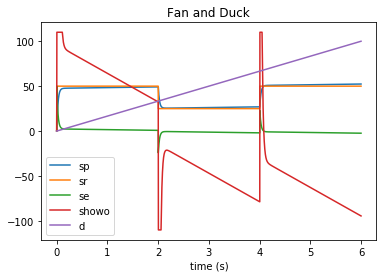

In [173]:
program = """
title Fan and Duck
time 6.0 0.001
d generator ramp 0.0 6.0 1000.0

temp1 const 50.0                    # construct new reference signal
temp2 generator puls 2.0 4.0 -25.0
sr summator temp1 1.0 temp2 1.0

effect summator d 0.1 o 0.5        # new reference signal is constant minus pulse
vel amplifier 0 effect 1.0 0.5
sp summator vel 1.0
se comparator sr sp
o summator se 40.0
showo limit o -110 110
group vel sp se o
plot t sp sr se showo d
scale 1 1.0 1.0 1.0 1.0 0.1
"""

a = AnalogComputer(program).run().plot()

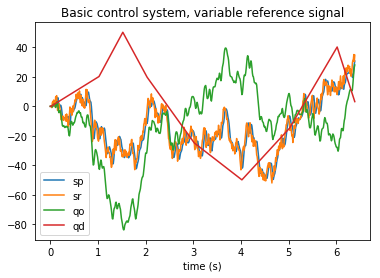

In [181]:
program = """
title Basic control system, variable reference signal
time 6.4 0.01
qd func 0.0 0.0 1.0 20.0 1.5 50.0 2.0 20.0 3.0 -25.0 4.0 -50.0 5.0 -15.0 6.0 40.0
temp1 generator random 0.2 0.2 0.2       # <-----------
sr summator temp1 100.0                  # <-----------
se comparator sr sp
qo integrator 0.0 se 50.0
qc summator qo 1.0 qd 1.0
sp summator qc 1.0
group qc sp se qo
plot t sp sr qo qd                     # <-----------
"""
a = AnalogComputer(program).run().plot()

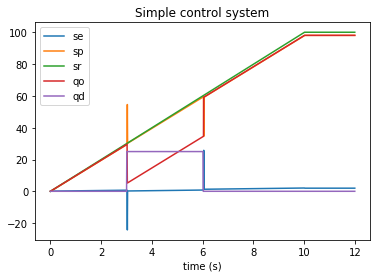

In [175]:
program = """
title Simple control system
time 12.0 0.01                     # duration 12 sec; dt 0.01 sec
group sp sr se qo qc
plot t se sp sr qo qd
begin
sp summator qc 1.0                 # input function
se comparator sr sp                # comparator
qo amplifier 0.0 se 50.0 0.51      # output t.c.= 0.51 sec.
qc summator qo 1.0 qd 1.0          # qc = output + dist
sr generator ramp 0.0 10.0 100.0   # ref signal is a ramp
qd generator puls 3.0 6.0 25.0     # disturbance is a pulse
end
"""
a = AnalogComputer(program).run().plot()

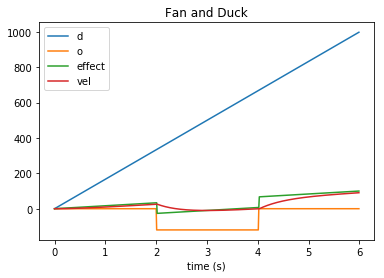

In [176]:
fan_and_duck= """
title Fan and Duck
time 6.0 0.01
d generator ramp 0.0 6.0 1000.0
o generator puls 2.0 4.0 -120.0
effect summator d 0.1 o 0.5  
vel amplifier 0.0 effect 1.0 0.5
plot t d o effect vel
"""

AnalogComputer(fan_and_duck).run().plot()

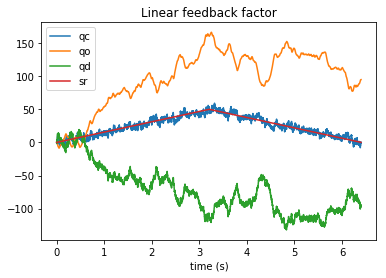

In [197]:
program = """title Linear feedback factor
time 6.4 0.001
temp0 generator random 0.005 0.05
qd summator temp0 10.0
sr func 0.0 0.0 3.2 50.0 6.4 0.0
se comparator sr sp
qo amplifier 0.0 se 500.0 10.0
qc summator qo 1.0 qd 1.0
sp summator qc 1.0
group qc sp se qo
plot t qc qo qd sr
"""
a = AnalogComputer(program).run().plot()

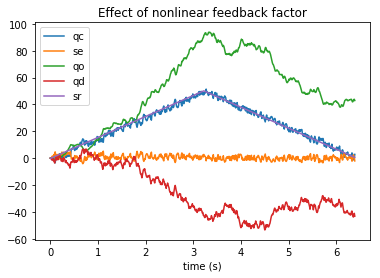

In [205]:
program = """
title Effect of nonlinear feedback factor
time 6.4 0.01
temp0 generator random 0.05 0.05
qd summator temp0 10.0
sr func 0.0 0.0 3.2 50.0 6.4 0.0
one const 1.0                             # < ==============
se comparator sr sp
temp1 amplifier 0 se 100.0 10.0                 # <===============
temp2 mult temp1 temp1                     # <===============
temp3 summator temp2 1.0 one 500.0         # <===============
temp4 mult temp1 temp3                     # <===============
qo summator temp4 0.1                      # <===============
qc summator qo 1.0 qd 1.0
sp summator qc 1.0
group qc sp se temp1 temp2 temp3 temp4 qo  # <===============
plot t qc se qo qd sr
"""
a = AnalogComputer(program).run().plot()